In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_strokes.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
data.shape

(43400, 12)

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
data['bmi']

0        18.0
1        39.2
2        17.6
3        35.9
4        19.1
         ... 
43395    20.4
43396    55.4
43397    28.9
43398    33.2
43399    20.6
Name: bmi, Length: 43400, dtype: float64

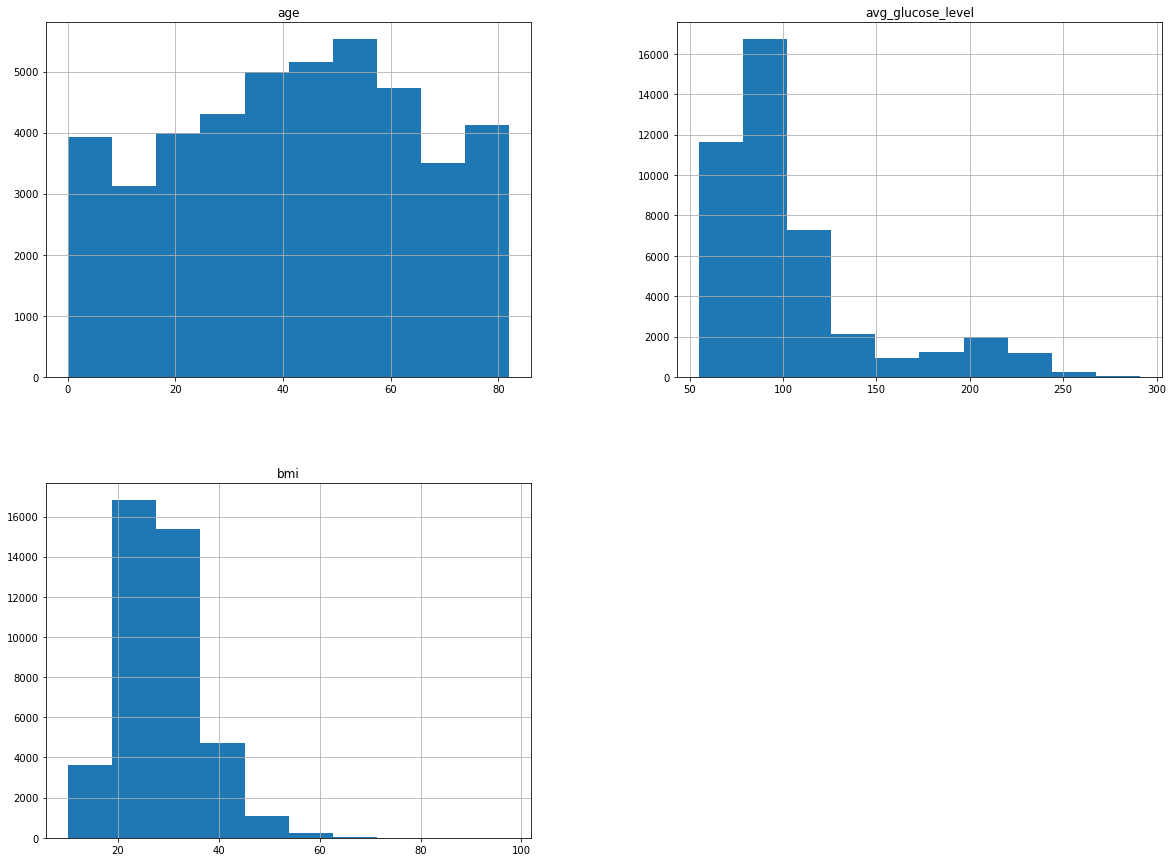

In [8]:
freqgraph = data.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(20,15))
plt.show()

#  bmi is right skewed so we can use median for filling null values

In [9]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [10]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [11]:
for i in ['smoking_status']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [12]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

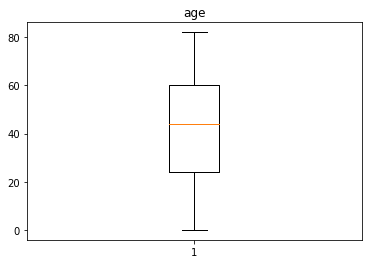

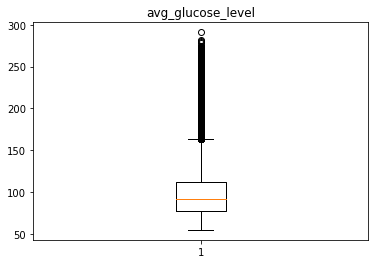

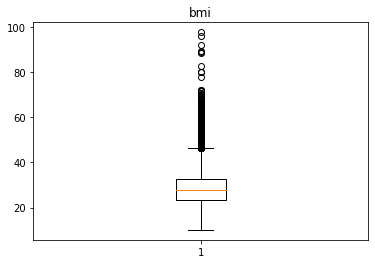

In [13]:
for i in ['age', 'avg_glucose_level', 'bmi']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [14]:
data.drop('id',axis=1,inplace=True)

In [15]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [16]:
X=data.drop('stroke',axis=1)
y=data['stroke']

In [17]:
X['avg_glucose_level'] = X['avg_glucose_level'].astype(float)

# scaling

In [18]:
norm_features=data[['avg_glucose_level','bmi']]
from sklearn.preprocessing import StandardScaler
standardisation = StandardScaler()
data[['avg_glucose_level','bmi']]= standardisation.fit_transform(norm_features)


In [19]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,-0.217176,-1.384161,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,-0.383258,1.390824,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,0.148621,-1.436520,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,-0.822123,0.958869,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,1.317458,-1.240176,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,-1.063359,-1.070012,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,2.531294,3.511331,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,-0.290939,0.042600,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,-0.123465,0.605451,never smoked,0


In [20]:
data['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

# label encoding worktype

In [21]:
data['work_type']=data['work_type'].map({'children':1 , 'Private':2, 'Never_worked' : 3,'Self-employed':4,'Govt_job':5})

In [22]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,1,Rural,-0.217176,-1.384161,never smoked,0
1,Male,58.0,1,0,Yes,2,Urban,-0.383258,1.390824,never smoked,0
2,Female,8.0,0,0,No,2,Urban,0.148621,-1.436520,never smoked,0
3,Female,70.0,0,0,Yes,2,Rural,-0.822123,0.958869,formerly smoked,0
4,Male,14.0,0,0,No,3,Rural,1.317458,-1.240176,never smoked,0


In [23]:
data['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [24]:
data['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [25]:
data['smoking_status']=data['smoking_status'].map({'never smoked':0, 'formerly smoked' : 1,'smokes':2 })

In [26]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,1,Rural,-0.217176,-1.384161,0,0
1,Male,58.0,1,0,Yes,2,Urban,-0.383258,1.390824,0,0
2,Female,8.0,0,0,No,2,Urban,0.148621,-1.436520,0,0
3,Female,70.0,0,0,Yes,2,Rural,-0.822123,0.958869,1,0
4,Male,14.0,0,0,No,3,Rural,1.317458,-1.240176,0,0


# onehot encoding 

In [27]:
data=pd.get_dummies(data)

In [28]:
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,3.0,0,0,1,-0.217176,-1.384161,0,0,0,1,0,1,0,1,0
1,58.0,1,0,2,-0.383258,1.390824,0,0,0,1,0,0,1,0,1
2,8.0,0,0,2,0.148621,-1.436520,0,0,1,0,0,1,0,0,1
3,70.0,0,0,2,-0.822123,0.958869,1,0,1,0,0,0,1,1,0
4,14.0,0,0,3,1.317458,-1.240176,0,0,0,1,0,1,0,1,0


# checking correlation

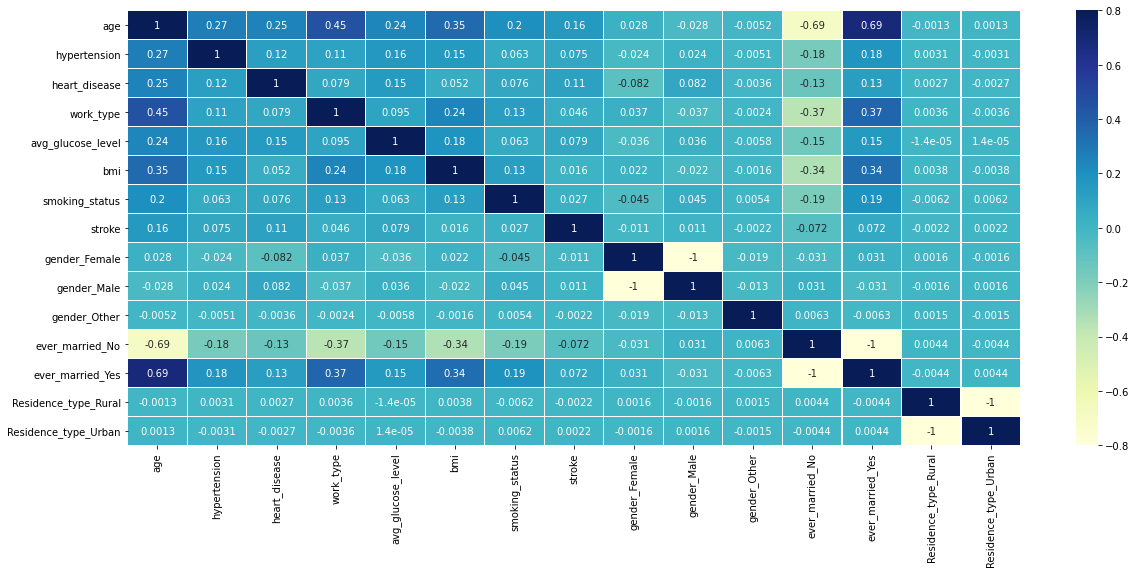

In [29]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.8,vmax=0.8,annot=True,linewidth=0.2,cmap='YlGnBu')

In [30]:
# Age and evermarried have strong correlation , we can drop any one of the column if we want.
#data.drop('age',axis=1,inplace=True)

# data splitting

In [31]:
X=data.drop('stroke',axis=1)
y=data['stroke']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# LR

In [33]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# kNN

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

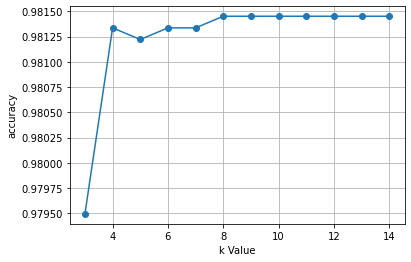

In [36]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [37]:
classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



# SVM

In [39]:
from sklearn.svm import SVC
sm = SVC()
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8519
           1       0.05      0.06      0.05       161

    accuracy                           0.96      8680
   macro avg       0.52      0.52      0.52      8680
weighted avg       0.96      0.96      0.96      8680



# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8519
           1       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

